![title image](figures/kickstarter_project_title.png)

# 1. Business Understanding


## 1.1 About Kickstarter
In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative.

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project. A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not.

The aim of this project is:
- to construct such a model 
- and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.


## 1.2 Project Presentation
Presentation of the results in Fall 2020, using the [Project Presentation deck](https://github.com/JonJae/SUCCESS_PREDICTION/blob/main/SuccessPrediction_presentation.pdf) .


## 1.3 Business Case / Key Questions
- Can a model (based on given or created project parameters) be created that predicts the success of a project on Kickstarter, greater than the baseline rate? Building such a model is the main task!
- Which factors have the greatest influence on a successful project? A list of recommendations for for project creators sould be another outcome of this work!


## 1.4 Performance Metric
The main aim of this project is to predict wether or not a Kickstarer campaign is successful (y=1) or not (y=0). As with all classification predictions, the model of concern might not be perfectly accurate. The model might predict a campaign as successful while the campaign actually failed (FP).  Or, an actual successful campaign is predicted as unsuccessful (FN). To compare different models among each other but also to describe the performance of a specific model to a shareholder, a Performance Metric needs to be chosen. 

This project focuses on the **F1-Score** as target metric. Reasoning: 

- F1-Score combines both precision (PPV ) and  recall (TPR, or sensitivity). Unlike PPV and TPR separately, it takes both false positives and false negatives into account simultaneously.
- In the context of success prediction, both wrongly predicted failing (False Negatives; prediction: failed, actual: success) and wrongly predicted succes (False Postive; prediction: success, actual: failed) are equally important. This is different e.g., for cancer predictions, where a low FN (prediction: no-cancer, actual: caner) rate is of utmost importance. 

The F1-Score is the *harmonic mean* of precision and recall. As a result, a prediction will only get a high F1-Score if both recall and precision are high. The F1-Score is calculated as followed: *F1 = 2 · (PPV · TPR) / (PPV + TPR)*

ROC-AUC was considered as alternative performance metric. The idea of using ROC-AUIC was discarded due to the easier interpretation of the F1-Score.  

# 2. Dataset Details

## 2.1 Origin of the dataset
Due to the fact that the given data sets (Kickstarter000.csv to Kickstarter055.csv) have the same structure (features and column-format, only 'country_displayable_name'- a reasonable feature btw. - is missing) as the data to be found on https://webrobots.io/kickstarter-datasets/ it can be assumed that this is also their source.  

The data was crawled by the company [WebRobots](https://webrobots.io/) ('We provide B2B web crawling and scraping services') directly from the [Kickstarter-Website](https://www.kickstarter.com/).

Current data (crawled within the timeframe 2014-04-22 to 2020-08-13) can be found there.  
All of the datasets contains snapshots of all kickstarter-projects (from the beginning in 2009) in the status at the crawl-date.

Notes from WebRobots:  
- From December 2015 we modified the collection approach to go through all sub-categories instead of only top level categories. This yields more results in the datasets, but possible **duplication where projects are listed in multiple categories**.
- From March 2016 we run this data crawl once a month. Datasets are available from scrape dates.
- We receive many question about timestamp format used in this dataset. It is unix-time. (Unix timestamps correspond to the number of seconds that have passed since 01.01.1970.)




## 2.2 Feature Glossary
**Prediction relevant features:**
- **state** - Indicates the status of the project. Categorical values: successful, failed, live, cancelled and suspended.  
THIS IS OUR TARGET. But we will only look after finalized projects with state successful or failed.
- **id** - Project-Id 
- **profile** - Contains the project-id and indicates the status (active/inactive).
- **category** - Contains (among other stuff) main and subcategory.
- **source_url** - URL of the corresponding category/subcategory.
- **country** - Country of origin of the project.
- **creator** - Data about the person who created the project.
- **backers_count** - Number of supporters who are invested (at crawling-date).
- **staff_pick** - True/false-values. Indicates that this project is highlighted by the staff. Promoted by email-newsletter and highlighted spots around the site.
- **launched_at** - Launch date of the project (UNIX Format).
- **deadline** - Deadline of the project. At this point the decision is made wheater the project gets realized (goal is reached) or not.
- **currency** - Currency of the project (e.g. USD, EUR)
- **goal** - Target-amount in project-currency.
- **static_usd_rate** - Static currency conversion rate.
- **usd_pledged** - Current pledged amount of USD (at crawling date, converted from "pledged" via "static_usd_rate", float).


**For our prediction not further considered:**
- **converted_pledged_amount** - Current pledged amount of USD (at crawling date, converted from "pledged" via "static_usd_rate", rounded).
- **created_at** - Date when Project was created (UNIX Format).
- **currency_symbol** - Symbol of the currency.
- **currency_trailing_code** - Defines whether the currency codes are always shown after the amounte locale.
- **current_currency** - Unknown (!) current currency. Not important, because we only look after converted USD.
- **disable_communication** - True when the campaign is suspend (?)
- **friends** - Many NaN and a few empty lists.
- **fx_rate** - Used to create 'converted_pledged_amount' from 'pledged', but does not always convert to dollars. Can be dropped ('static_usd_rate'  always converts to dollars).
- **is_backing** - Many empty entries and a few false-values.
- **is_starrable** - true/false-values. Unknown (!)
- **is_starred** - Many empty entries and a few false-values.
- **name** - Name of the project.
- **permissions** - Many NaN and a few empty lists.
- **photo** - Some information regarding the project-photos.
- **pledged** - Unconverted pledged amount as float.
- **slug** - Creator-selected keyword id of the project.
- **spotlight** - True/false-values. A possible feature that allows every successfully funded Kickstarter project to tell its story from beginning to end.
- **state_changed_at** - State-changed-date of the project (UNIX Format).
- **urls** - Link directly to the project on kickstarter.
- **usd_type** - domestic, international or NaN. Not important, because we only look after converted USD.

# 3. Environment Set-Up
## 3.1 Imports

In [1]:
#standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# special imports
import warnings


#specific libaries
import glob 
    # read all csv files in the directory
    # documentation: https://docs.python.org/3/library/glob.html#glob.glob
import time
    # converting int/unix representation of Dates to DateTime Format

#ML - PreProcessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#ML - Models and Grids 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Output and Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 3.2 Global Variables and Settings

In [2]:
#reset -f#cleaning the namespace / self assigned variables

warnings.filterwarnings('ignore') #for suppression of depricated messages
RSEED = 42       #for replicability purposes
sns.set(style="white")  #default plot styling 

#Modeling
scoring = "f1"

# 4. Data Mining


In [3]:
raw_content = [pd.read_csv(file) for file in glob.glob('data/Kickstarter*.csv')]
#df_rawdata --> data as imported
df_rawdata = pd.concat(raw_content, ignore_index = True)

In [4]:
#df --> data for data cleaning and data exploration
df = df_rawdata.copy()
print(df.shape)
df.sample(2).T

(186499, 37)


,115988,75097
backers_count,167,9
blurb,A revolutionary hockey stick with an offset sh...,Enable Full Walrus make people feel weird all ...
category,"{""id"":7,""name"":""Design"",""slug"":""design"",""posit...","{""id"":40,""name"":""Indie Rock"",""slug"":""music/ind..."
converted_pledged_amount,32729,520
country,US,US
created_at,1528324043,1499611960
creator,"{""id"":1241679019,""name"":""Elevate Hockey"",""slug...","{""id"":466868908,""name"":""Noah Schneidman"",""is_r..."
currency,USD,USD
currency_symbol,$,$
currency_trailing_code,True,True


## 4.1 Inspection

In [5]:
#Key Facts about the DataSet
print(f'number of features: {df.shape[1]}') 
print(f'number of data points: {df.shape[0]}') 
print()
print(f'Coloumn names:  \n {df.columns}')

number of features: 37
number of data points: 186499

Coloumn names:  
 Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186499 entries, 0 to 186498
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             186499 non-null  int64  
 1   blurb                     186492 non-null  object 
 2   category                  186499 non-null  object 
 3   converted_pledged_amount  186499 non-null  int64  
 4   country                   186499 non-null  object 
 5   created_at                186499 non-null  int64  
 6   creator                   186499 non-null  object 
 7   currency                  186499 non-null  object 
 8   currency_symbol           186499 non-null  object 
 9   currency_trailing_code    186499 non-null  bool   
 10  current_currency          186499 non-null  object 
 11  deadline                  186499 non-null  int64  
 12  disable_communication     186499 non-null  bool   
 13  friends                   257 non-null     o

## 4.2 Missing Values

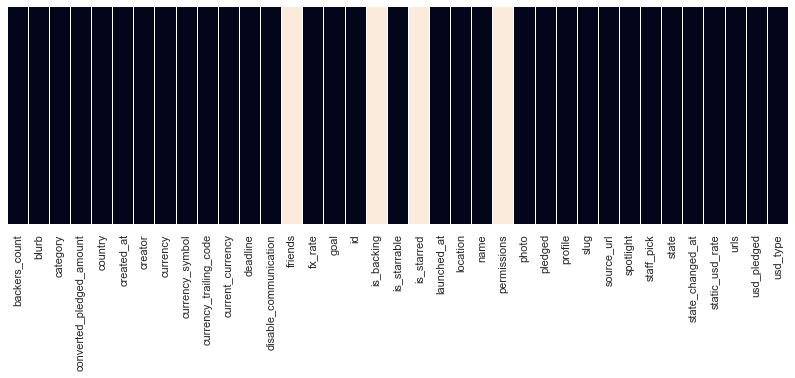

In [7]:
#exploring missing values --> few coloumns where close to all values are missing. 
plt.figure(figsize=(14,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

In [8]:
mask = df.columns[df.isnull().any(axis=0)]
null_values = df[mask].isnull().sum()
null_values = null_values.sort_values(ascending=False)
print('isnull values per coloumn (if there are any)')
print(null_values)

isnull values per coloumn (if there are any)
permissions    186242
is_starred     186242
is_backing     186242
friends        186242
usd_type          415
location          205
blurb               7
dtype: int64


In [9]:
df.describe().round(2)

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,186499.00,186499.00,1.864990e+05,1.864990e+05,186499.00,1.864990e+05,1.864990e+05,1.864990e+05,186499.00,1.864990e+05,186499.00,186499.00
mean,145.94,12883.18,1.456167e+09,1.463106e+09,0.99,4.911979e+04,1.073433e+09,1.460279e+09,18775.78,1.462910e+09,1.01,12885.65
std,895.10,86418.36,6.341964e+07,6.307278e+07,0.21,1.163584e+06,6.198831e+08,6.310738e+07,329457.28,6.292094e+07,0.23,86472.21
min,0.00,0.00,1.240456e+09,1.241334e+09,0.01,1.000000e-02,1.852000e+04,1.240603e+09,0.00,1.241334e+09,0.01,0.00
25%,4.00,107.00,1.413425e+09,1.420770e+09,1.00,1.500000e+03,5.353814e+08,1.417757e+09,110.00,1.420655e+09,1.00,107.02
50%,27.00,1538.00,1.457993e+09,1.464804e+09,1.00,5.000000e+03,1.075065e+09,1.462029e+09,1555.00,1.464754e+09,1.00,1538.00
75%,89.00,6543.00,1.511806e+09,1.519583e+09,1.00,1.500000e+04,1.609994e+09,1.516771e+09,6881.16,1.519503e+09,1.00,6543.50
max,105857.00,7211620.00,1.552515e+09,1.557718e+09,1.88,1.000000e+08,2.147476e+09,1.552536e+09,81030744.00,1.552536e+09,1.72,7211620.08


In [10]:
print('number of observations: ', df.shape[0])
print(f'number of unique IDs:', df.id.nunique())
print('duplicates in ID colm: ', df.shape[0]- df.id.nunique())

number of observations:  186499
number of unique IDs: 165018
duplicates in ID colm:  21481


In [11]:
print('Unique Values per Column:')
df.nunique().sort_values()

Unique Values per Column:


permissions                      1
is_backing                       1
friends                          1
is_starrable                     2
staff_pick                       2
spotlight                        2
is_starred                       2
disable_communication            2
currency_trailing_code           2
usd_type                         2
current_currency                 5
state                            5
currency_symbol                  6
currency                        14
country                         22
fx_rate                         65
category                       169
source_url                     169
backers_count                 3143
goal                          4792
static_usd_rate              10838
location                     14416
converted_pledged_amount     29963
pledged                      41729
usd_pledged                  73110
deadline                    155227
state_changed_at            156289
blurb                       163695
name                

In [12]:
print('different states campaigns have: ', df.state.unique())

different states campaigns have:  ['live' 'successful' 'failed' 'canceled' 'suspended']


## 4.3 Observations
- **non-intutive colm names** e.g., `blurb`, `fx_rate`, `friend`, `permission`, `slug` --> further explaination
- **insignificant number of entries** in `friend`, `is_starre`, `is_backing` --> possibily dropping these features
- most features contain no missing values, no specific handling of missing values required
- **few missing values in usd_type, location and blurb** --> possibly dropping these observation
- various **duplicate IDs** --> might be caused by change of state 
- **state** contains additional states beyond `Successful` / `Unsuccessful` --> dropping? 
  

In [13]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

# 5. Data Cleaning


## 5.1 Dropping Non-Usefull Columns

In [14]:
lst = []

lst.append('location') #--> Detailed Location of the project. We have 'Country of origin'. MAYBE USEFULL.
lst.append('blurb') #--> short description of the offered product/service written for promotional purposes. MAYBE USEFULL.
lst.append('slug') #--> Creator-selected keyword id of the project. Not used here. MAYBE USEFULL.

lst.append('converted_pledged_amount') #--> redundant, a better version is usd_pledged
lst.append('created_at') #--> Date when Project was created (UNIX Format). Not used here.
lst.append('currency_symbol') #--> Symbol of the currency. Not used here.
lst.append('currency_trailing_code') #--> Defines whether the currency codes are always shown after the amounte locale. Not used here.
lst.append('current_currency') #--> Unknown (!) current currency. Not important, because we only look after converted USD.
lst.append('disable_communication') #--> True when the campaign is suspend (?) Not used here.
lst.append('friends') #--> Many NaN and a few empty lists. Not used here.
lst.append('fx_rate') #--> Used to create 'converted_pledged_amount' from 'pledged', but does not always convert to dollars. Can be dropped ('static_usd_rate'  always converts to dollars).
lst.append('is_backing') #--> Many empty entries and a few false-values. Not used here.
lst.append('is_starrable') #--> true/false-values. Unknown (!) Not used here.
lst.append('is_starred') #--> Many empty entries and a few false-values. Not used here.
lst.append('name') #--> Name of the project. Not used here.
lst.append('permissions') #--> Many NaN and a few empty lists. Not used here.
lst.append('photo') #--> Some information regarding the project-photos. contains non-callable link to image. Not used here.
lst.append('pledged') #--> Unconverted pledged amount as float. Not used here.
lst.append('spotlight') #--> True/false-values. A possible feature that allows every successfully funded Kickstarter project to tell its story from beginning to end.
lst.append('state_changed_at') #--> State-changed-date of the project (UNIX Format). Not used here.
lst.append('urls') #--> Link directly to the project on kickstarter. Not used here.
lst.append('usd_type') #--> domestic, international or NaN. Not important, because we only look after converted USD.
lst.append('source_url') #--> URL of the corresponding category/subcategory. Not used here.

print('features to drop: \n', lst)

#DECOMMEND FOR ACTUAL DROP 
df.drop(lst, axis=1, inplace=True)

features to drop: 
 ['location', 'blurb', 'slug', 'converted_pledged_amount', 'created_at', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'disable_communication', 'friends', 'fx_rate', 'is_backing', 'is_starrable', 'is_starred', 'name', 'permissions', 'photo', 'pledged', 'spotlight', 'state_changed_at', 'urls', 'usd_type', 'source_url']


## 5.2 Calc of 'usd_goal' ('goal' * 'static_usd_rate')

For ease of reading and better comparability between projects, the `goal` feature is transfer into USD using the given `static_usd_rate`. The new column is named `ùsd_goal`. Note that addtional feature engneering is done in the chapter '7.Feature Engneering', but since currency consistent goal data will help with the analysis, an exception is made. 

In [15]:
# Creation of a new Colm defined as Goal * Static USD Rate
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'], 2)
print('Example USD_goal Colm:')
df[['country','currency','goal','static_usd_rate','usd_goal']][42:44]

Example USD_goal Colm:


,country,currency,goal,static_usd_rate,usd_goal
42,US,USD,2550.0,1.0,2550.0
43,US,USD,3876.0,1.0,3876.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186499 entries, 0 to 186498
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   backers_count    186499 non-null  int64  
 1   category         186499 non-null  object 
 2   country          186499 non-null  object 
 3   creator          186499 non-null  object 
 4   currency         186499 non-null  object 
 5   deadline         186499 non-null  int64  
 6   goal             186499 non-null  float64
 7   id               186499 non-null  int64  
 8   launched_at      186499 non-null  int64  
 9   profile          186499 non-null  object 
 10  staff_pick       186499 non-null  bool   
 11  state            186499 non-null  object 
 12  static_usd_rate  186499 non-null  float64
 13  usd_pledged      186499 non-null  float64
 14  usd_goal         186499 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(6)
memory usage: 20.1+ MB


## 5.3 Creating 'project-id' from 'profile'

In [17]:
# Creating 'project_id' for checking duplicates

In [18]:
df['project_id'] = [int(df.profile[i].split(':')[2].split(',')[0]) for i in df.index]
df.project_id[42:44]

42     452338
43    1211337
Name: project_id, dtype: int64

## 5.4 Creating Target-Column 'success' from 'state'

In [19]:
# Creation of a new Column `success` 
def success_recognition(row):
    """returns 0 for unsuccessful and 1 for successful projects"""
    if row['state'] == 'successful':
        return 1
    if row['state'] == 'live' and row['usd_pledged'] >= row['usd_goal']:
        return 1
    else:
        return 0

df['success'] = df.apply(success_recognition, axis=1)

In [20]:
print('state,usd_pledged, usd_goal and resulting success:')
df[['state','usd_pledged','usd_goal','success']][(df['state'] == 'live')|(df['state'] == 'failed')]

state,usd_pledged, usd_goal and resulting success:


,state,usd_pledged,usd_goal,success
0,live,28645.000000,28000.00,1
3,failed,165.384934,12160.66,0
10,failed,0.000000,150000.00,0
12,live,47.000000,10000.00,0
24,failed,5.473783,54737.83,0
...,...,...,...,...
186484,failed,1.207595,1811.39,0
186485,failed,394.300000,5500.00,0
186488,failed,1583.000000,28000.00,0
186489,failed,156.000000,800.00,0


## 5.5 Visualization of 'state' Distribution
Graphical representation of the distribution of the different states

state
canceled        7718
failed         66900
live            6503
successful    104812
suspended        566
Name: id, dtype: int64


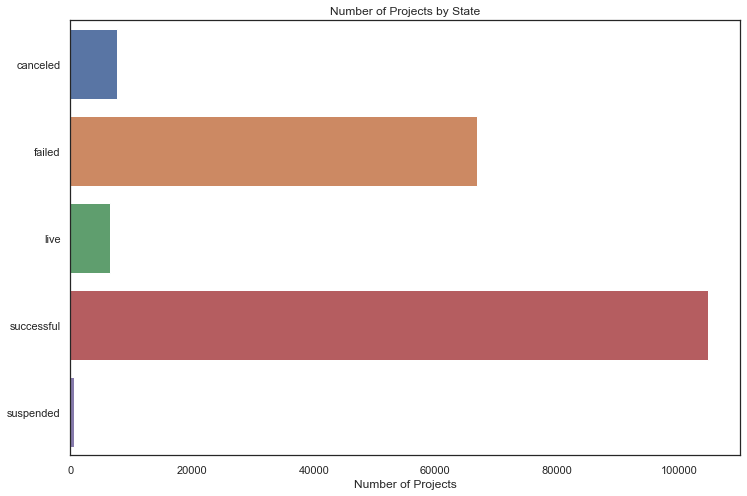

In [21]:
# How many Kickstarter projects are there? What about the distribution of types?
state_counts = df.groupby(by='state')['id'].count()
state_counts_labels = state_counts.index.values.tolist()
state_counts_sizes = state_counts.values.tolist()
print(state_counts)

f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = state_counts_sizes, y = state_counts_labels)
#sns.despine(trim=True)
ax.set_title("Number of Projects by State")
ax.set_xlabel("Number of Projects")
plt.savefig('figures/state_distribution_before.png', transparent=True)
plt.show()

**Observation:** Distinguishing between successful and unsuccessful is not all that easy. In the following step all cancled, suspended and live projects that are not yet successful are dropped to generate a binary target column. 


## 5.6 Dropping rows: 'state' == 'cancled' or 'suspended' or 'live' (!=1)

In [22]:
## Dropping all rows with 'state'= 'cancled' or 'suspended' or ('live' and 'success' !=1)
print('df.shape: ',df.shape)

non_success1 = df[df['state'] == 'canceled'].index # length=8624
df.drop(non_success1 , inplace=True)
print('df.shape: ',df.shape)

non_success2 = df[df['state'] == 'suspended'].index # length=623
df.drop(non_success2 , inplace=True)
print('df.shape: ',df.shape)

non_success3 = df[(df['state'] == 'live')&(df['success'] == 0)].index # length=5377
df.drop(non_success3 , inplace=True)
print('df.shape: ',df.shape)

df.shape:  (186499, 17)
df.shape:  (178781, 17)
df.shape:  (178215, 17)
df.shape:  (173420, 17)


## 5.7 Visualization of new 'state' Distribution
Graphical representation of the new distribution of the different states (only Success or Failed)

success
0     66900
1    106520
Name: id, dtype: int64


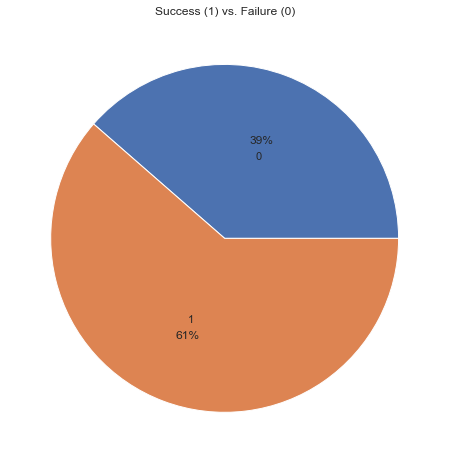

In [23]:
# Suitable here, because Live-Projects contains no success=0 at this time
new_state_counts = df.groupby(by='success')['id'].count()
new_state_counts_labels = new_state_counts.index.values.tolist()
new_state_counts_sizes = new_state_counts.values.tolist()
#new_state_counts
print(new_state_counts)

f, ax = plt.subplots(figsize=(8, 8))
plt.pie(new_state_counts_sizes, labels=new_state_counts_labels, autopct='%.0f%%', labeldistance=.5)
plt.title("Success (1) vs. Failure (0)")
plt.savefig('figures/state_distribution_after.png', transparent=True)
plt.show()

**Observation:** 60% of all projects are successful. 

## 5.8 Extracting 'category' / 'sub_category' Features from string formated colms

In [24]:
#"category" --> main_category, keeping category intact
print('BEFORE extraction: \n', df.category[42:44])
df["main_category"] = [df.category[i].split('"')[9].split('/')[0].title() for i in df.index]
print('AFTER extraction: \n', df.main_category[42:44])

BEFORE extraction: 
 45    {"id":312,"name":"Restaurants","slug":"food/re...
46    {"id":313,"name":"Small Batch","slug":"food/sm...
Name: category, dtype: object
AFTER extraction: 
 45    Food
46    Food
Name: main_category, dtype: object


In [25]:
# category --> subcategory, keeping category intact
print('BEFORE extraction: \n', df.category[42:44])
df["sub_category"] = [df.category[i].split('"')[5] for i in df.index]
df["sub_category"] = df["sub_category"].str.replace("%20", "_")
print('AFTER extraction: \n', df.sub_category[42:44])

BEFORE extraction: 
 45    {"id":312,"name":"Restaurants","slug":"food/re...
46    {"id":313,"name":"Small Batch","slug":"food/sm...
Name: category, dtype: object
AFTER extraction: 
 45    Restaurants
46    Small Batch
Name: sub_category, dtype: object


In [26]:
# Creating a combined total_category
df["total_category"] = df["main_category"]+'//'+df["sub_category"]

In [27]:
print(f'''
Number of unique Main-Categories:    {df.main_category.nunique()}
Number of unique Sub-Categories:    {df.sub_category.nunique()}
Number of unique Total-Categories:  {df.total_category.nunique()}''')


Number of unique Main-Categories:    15
Number of unique Sub-Categories:    159
Number of unique Total-Categories:  169


In [28]:
df.groupby(["sub_category",'total_category']).count()
# sub_category 'Live Games' ansehen und prüfen!

,,backers_count,category,country,creator,currency,deadline,goal,id,launched_at,profile,staff_pick,state,static_usd_rate,usd_pledged,usd_goal,project_id,success,main_category
sub_category,total_category,,,,,,,,,,,,,,,,,,
3D Printing,Technology//3D Printing,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
Academic,Publishing//Academic,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888
Accessories,Fashion//Accessories,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092
Action,Film & Video//Action,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
Animals,Photography//Animals,283,283,283,283,283,283,283,283,283,283,283,283,283,283,283,283,283,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodworking,Crafts//Woodworking,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
Workshops,Dance//Workshops,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
World Music,Music//World Music,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034


## 5.9 Transforming Unix Date representations to DateTime

In [29]:
#colms to transform
# colms = ['created_at', 'deadline', 'launched_at', 'state_changed_at']
# 'created_at' und 'state_changed_at' gibt es zu diesem Zeitpunkt nicht mehr
colms = ['deadline', 'launched_at']

#documentation of data type before transformation
colms_dtype = {colm: df[colm].dtypes for colm in colms}
print(f'BEFORE transformation \n {colms_dtype}')

# converting: Unix --> DateTime 
for colm in colms:
    df[colm] = pd.to_datetime(df[colm], unit='s')

#documentation of data type transformation
colms_dtype = {colm: df[colm].dtypes for colm in colms}
print(f'AFTER transformation \n {colms_dtype}')

BEFORE transformation 
 {'deadline': dtype('int64'), 'launched_at': dtype('int64')}
AFTER transformation 
 {'deadline': dtype('<M8[ns]'), 'launched_at': dtype('<M8[ns]')}


## 5.10 Duration and Launch/Deadline 

In [30]:
# Launch Day/Month, Deadline Day/Month, Duration
df['duration_days'] = df['deadline'] - df['launched_at']
print('Duration:',df.duration_days[42]) 

df['launch_hour'] = df['launched_at'].dt.hour
print('Launch Hour:',df.launch_hour[42]) 

df['launch_day'] = df['launched_at'].dt.day_name()
print('Launch Day:',df.launch_day[42]) 

df['launch_month'] = df['launched_at'].dt.month_name()
print('Launch Month:',df.launch_month[42])

df['launch_year'] = df['launched_at'].dt.year
print('Launch Year:',df.launch_year[42])

df['deadline_hour'] = df['deadline'].dt.hour
print('Deadline Day:',df.deadline_hour[42]) 

df['deadline_day'] = df['deadline'].dt.day_name()
print('Deadline Day:',df.deadline_day[42]) 

df['deadline_month'] = df['deadline'].dt.month_name()
print('Deadline Month:',df.deadline_month[42]) 

df['deadline_year'] = df['deadline'].dt.year
print('Deadline Year:',df.deadline_year[42])

Duration: 19 days 02:26:57
Launch Hour: 19
Launch Day: Saturday
Launch Month: February
Launch Year: 2013
Deadline Day: 21
Deadline Day: Thursday
Deadline Month: February
Deadline Year: 2013


## 5.11 Calculation of Median Backing in each Sub Category as new feature

In [31]:
#calculating average pledge per backer for each observation
df['avg_pledge_per_backer_at_project'] = df.usd_pledged / df.backers_count # Hier entstehen auch NaN-Werte!
df['avg_pledge_per_backer_at_project'].head()

0     90.936508
1     41.489362
2     82.671587
3     55.128311
4    940.000000
Name: avg_pledge_per_backer_at_project, dtype: float64

In [32]:
#median of the average pledge per backer in each sub_categobry
df['median_avg_pledge_per_backer_in_subcat'] = df['avg_pledge_per_backer_at_project'].groupby(df['total_category']).transform('median')
#df[['name','total_category', 'avg_pledge_per_backer_at_project', 'usd_pledged', 'backers_count', 'median_avg_pledge_per_backer_in_subcat']].head(3)
df[['total_category', 'avg_pledge_per_backer_at_project', 'usd_pledged', 'backers_count', 'median_avg_pledge_per_backer_in_subcat']].head(3)

,total_category,avg_pledge_per_backer_at_project,usd_pledged,backers_count,median_avg_pledge_per_backer_in_subcat
0,Fashion//Footwear,90.936508,28645.0,315,97.615508
1,Games//Playing Cards,41.489362,1950.0,47,36.750000
2,Music//Rock,82.671587,22404.0,271,61.578947


## 5.12 Dropping Duplicates

In [33]:
# Checking for project duplicates
print(f'''In the {len(df)} projects in the dataset,
there are {len(df[df.duplicated(subset='project_id',keep='first')])} ones, which are listed more than once.''')

In the 173420 projects in the dataset,
there are 19575 ones, which are listed more than once.


In [34]:
print('Shape before dropping duplicates:', df.shape)
duplicates = df[df.duplicated(subset='project_id',keep='last')].index #length at full df=24562
df.drop(duplicates , inplace=True)
print('Shape after dropping duplicates: ', df.shape)

Shape before dropping duplicates: (173420, 31)
Shape after dropping duplicates:  (153845, 31)


## 5.13 Potential Analysis: ['usd_pledged'] == 0

In [35]:
print(df.shape)
print(df[df['usd_pledged'] == 0].shape)

(153845, 31)
(13231, 31)


## 5.14 NaN Values in `avg_pledge_per_backer_at_project`

In [36]:
mask = df.columns[df.isnull().any(axis=0)]
null_values = df[mask].isnull().sum()
null_values = null_values.sort_values(ascending=False)
print('BEFORE NAN-Treatment,  isnull values:')
print(null_values)

df['avg_pledge_per_backer_at_project'] = df['avg_pledge_per_backer_at_project'].fillna(0)

mask = df.columns[df.isnull().any(axis=0)]
null_values = df[mask].isnull().sum()
null_values = null_values.sort_values(ascending=False)
print('AFTER NAN-Treatment, isnull values:')
print(null_values)

BEFORE NAN-Treatment,  isnull values:
avg_pledge_per_backer_at_project    13231
dtype: int64
AFTER NAN-Treatment, isnull values:
Series([], dtype: float64)


## 5.15 True/False --> 1/0

In [37]:
print(list(df.staff_pick[:15]))
df["staff_pick"] = df["staff_pick"].astype(int).astype('category')
print(list(df.staff_pick[:15]))

[False, False, False, False, False, False, False, True, False, False, False, False, False, True, False]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]


## 5.16 Categorical

In [38]:
df['staff_pick'] = df['staff_pick'].astype('category')
df['country'] = df['country'].astype('category')
df['currency'] = df['currency'].astype('category')
df['duration_days'] = df['duration_days'].astype('category')

df['launch_hour'] = df['launch_hour'].astype('category')
df['launch_day'] = df['launch_day'].astype('category')
df['launch_month'] = df['launch_month'].astype('category')
df['launch_year'] = df['launch_year'].astype('category')

df['deadline_hour'] = df['deadline_hour'].astype('category')
df['deadline_day'] = df['deadline_day'].astype('category')
df['deadline_month'] = df['deadline_month'].astype('category')
df['deadline_year'] = df['deadline_year'].astype('category')

## 5.17 Dropping remaining Non-Usefull Columns

In [39]:
lst = []
#lst.append('source_url') #--> useful information extracted
lst.append('goal') #--> goal in country currency, replaced by usd_goal
lst.append('static_usd_rate') #--> used for usd_goal
lst.append('state') #--> no longer needed. success is the new target
lst.append('category')
lst.append('creator')
lst.append('main_category')
lst.append('sub_category')
lst.append('deadline')
lst.append('id')
lst.append('launched_at') #--> needs to be decommented after success per year graph is fixed!
lst.append('profile')
lst.append('project_id')

print('features to drop: \n', lst)

#DECOMMEND FOR ACTUAL DROP 
df.drop(lst, axis=1, inplace=True)

print('REMAINING COLMS: ')
print(df.columns)

features to drop: 
 ['goal', 'static_usd_rate', 'state', 'category', 'creator', 'main_category', 'sub_category', 'deadline', 'id', 'launched_at', 'profile', 'project_id']
REMAINING COLMS: 
Index(['backers_count', 'country', 'currency', 'staff_pick', 'usd_pledged',
       'usd_goal', 'success', 'total_category', 'duration_days', 'launch_hour',
       'launch_day', 'launch_month', 'launch_year', 'deadline_hour',
       'deadline_day', 'deadline_month', 'deadline_year',
       'avg_pledge_per_backer_at_project',
       'median_avg_pledge_per_backer_in_subcat'],
      dtype='object')


## 5.18 Creating df_clean

In [40]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153845 entries, 0 to 186498
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   backers_count                           153845 non-null  int64   
 1   country                                 153845 non-null  category
 2   currency                                153845 non-null  category
 3   staff_pick                              153845 non-null  category
 4   usd_pledged                             153845 non-null  float64 
 5   usd_goal                                153845 non-null  float64 
 6   success                                 153845 non-null  int64   
 7   total_category                          153845 non-null  object  
 8   duration_days                           153845 non-null  category
 9   launch_hour                             153845 non-null  category
 10  launch_day                      

# 6. Data Exploration
Form hypotheses about your defined problem by visually analyzing the data

## 6.1 Graph: Success per year

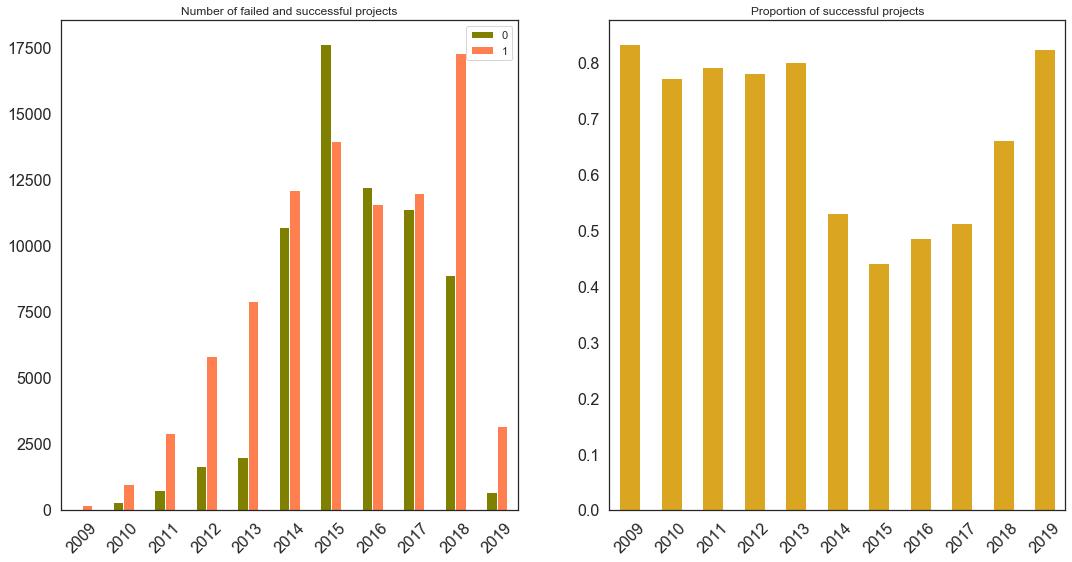

In [41]:
###### DATA SELECTION by defining a new table #######
success_by_year = df.set_index('launch_year').success
success_by_year = pd.get_dummies(success_by_year)#.resample('YS').sum()
success_by_year = success_by_year.groupby('launch_year').sum()
success_by_year

### SUBPLOT SETTINGS ###
fig, ax = plt.subplots(1,2, figsize=(18, 9))

### RIGHT Subplot ###
success_by_year.plot.bar(ax=ax[0], color=['olive', 'coral'])
ax[0].set_title('Number of failed and successful projects')
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=16)
ax[0].set_xticklabels(list(range(2009,2020)), rotation=45)

### LEFT Subplot ###
success_by_year.div(success_by_year.sum(axis=1), axis=0)[1].plot(kind='bar', ax=ax[1], color='goldenrod') # Normalizes counts across rows
ax[1].set_title('Proportion of successful projects')
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=16)
ax[1].set_xticklabels(list(range(2009,2020)), rotation=45)

### CLEANING WORKSPACE ###
del success_by_year


### OUTPUT ###
plt.savefig('figures/success_per_year.png', transparent=True)
plt.show()

**Observation:**
- for all years but 2015 and 2016, the number of successfull projects exceeds the number of unsuccessfull projects
- there is no clear trend about the relation of successfull and unsuccessfull project
- The total number of successfull projects in 2018 is greater then the number of unsuccessfull projects in the other years (except 2015)
- the proportion of successful pprojects was highest in 2019 with nearly 90% and lowest in 2015 with aout 45% successfull projects 

## 6.2 Graph: Count Total_Category

<Figure size 432x288 with 0 Axes>

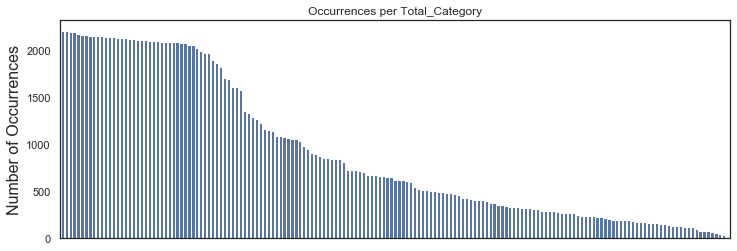

In [42]:
count_total_cat = df['total_category'].value_counts()

plt.figure()
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(count_total_cat.index, count_total_cat.values, color='b')
plt.title('Occurrences per Total_Category')
plt.ylabel('Number of Occurrences', fontsize=16)
ax.get_xaxis().set_ticks([])
plt.xlabel('')

### CLEANING WORKSPACE ###
del count_total_cat

###### OUTPUT #######
plt.savefig('figures/count_total_category.png', transparent=True)
plt.show();

This graph shows the number of projects in each sub-category. Note that `total_category` represents the main-category + the sub-category. 

**Observations:** 
- The first 25% most common sub-categories are equally well represented in the dataset
- It is notable that there is a synthetic looking cut-off for the most common categories, we expected a sorted gausian distribution. 

## 6.3 Success by 'total_category' for most frequent sub categories
What is the successrate for the most frequent total_categories?

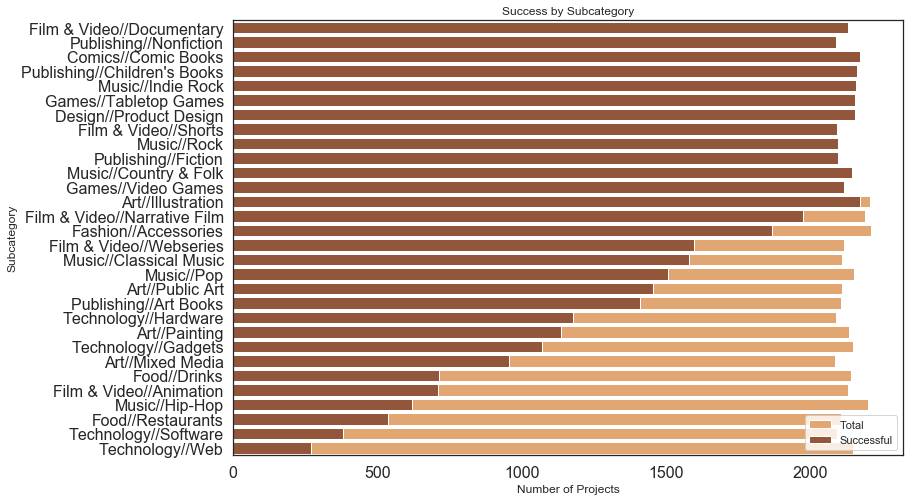

In [43]:
###### DATA SELECTION by defining a new table #######
success_by_subcategory = pd.pivot_table(df, index='total_category', columns='success', values='usd_pledged', aggfunc='count', fill_value = 0)
success_by_subcategory['total'] = success_by_subcategory[0] + success_by_subcategory[1] 
success_by_subcategory.columns = ['failed', 'successful', 'total']
success_by_subcategory['success_rate'] = success_by_subcategory['successful'] / success_by_subcategory['total']

#tweaking the data --> tweaking the plot. 
#sort_values(by=...) --> 'total' or successrate, or successrate AND Ascending=True
success_by_subcategory = success_by_subcategory.sort_values(by=['total'], ascending=False).reset_index()

#number of total_categories to illustrate
topcategories = success_by_subcategory.head(30)
#sorting topcategories by their success_rate
topcategories = topcategories.sort_values(by=['success_rate'], ascending=False).reset_index()


###### PLOT SETTINGS #######
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='total', y='total_category', data=topcategories, label='Total', color="sandybrown")
sns.barplot(x='successful', y='total_category', data=topcategories, label='Successful', color='sienna')

plt.tick_params(labelsize=16)
plt.title("Success by Subcategory")
plt.xlabel("Number of Projects")
plt.ylabel("Subcategory")
plt.legend()

### CLEANING WORKSPACE ###
#del success_by_subcategory, topcategories


###### OUTPUT #######
plt.savefig('figures/success_per_total_cat.png', transparent=True, bbox_inches='tight')
plt.show()

This graph shows the 30 most successfull sub-categories, sorted by their success rate. 

**Observation:**
- Film & Video Documentary as well as 12 other sub-categories have a (close to) 100% success rate (maybe due to synthetic cut off?)
- Film, publishing, comics, and music are well represented within the most successfull sub-categories

## 6.4 Backing in `total_category`

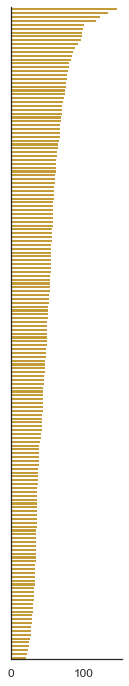

In [44]:
medians = df[['median_avg_pledge_per_backer_in_subcat', 'total_category']].groupby('total_category').mean().round(2)
medians = medians.sort_values(by='median_avg_pledge_per_backer_in_subcat', ascending=False)
medians_selection = medians#.head()
medians_selection


f, ax = plt.subplots(figsize=(2, 12))
sns.barplot(x=medians_selection.median_avg_pledge_per_backer_in_subcat, y=medians_selection.index, color='goldenrod')
ax.set_title("")
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.tick_params(labelsize=12)
plt.savefig('figures/overview_medians.png', transparent=True, bbox_inches='tight')
plt.show()

This graph shows the distribution of backing over the sub-categories. We wanted to investigate wether the distribution is balanced (e.g., most sub-categories have simmilar avg backings per backer) or not (e.g., much higher backing in some sub-catgories then in others). 
**Observation:** The backing in each sub-category are mostly equal distributed with 4 outlyer categories. The three highest backed sub-categories are Camera Equipment, Sound and Technology (all in the main category 'Technology'). 

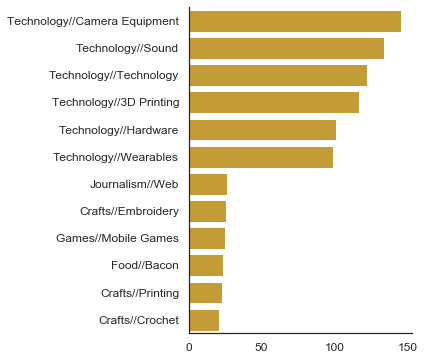

In [45]:
medians = df[['median_avg_pledge_per_backer_in_subcat', 'total_category']].groupby('total_category').mean().round(2)
medians = medians.sort_values(by='median_avg_pledge_per_backer_in_subcat', ascending=False)
medians_selection = pd.concat([medians.tail(6),medians.head(6)]).sort_values(by='median_avg_pledge_per_backer_in_subcat', ascending=False)
medians_selection


f, ax = plt.subplots(figsize=(4, 6))
sns.barplot(x=medians_selection.median_avg_pledge_per_backer_in_subcat, y=medians_selection.index, color='goldenrod')
ax.set_title("")
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.tick_params(labelsize=12)
plt.savefig('figures/median_avg_pledge_per_backer_in_subcat.png', transparent=True, bbox_inches='tight')
plt.show()

This graph shows the 6 highest and lowest avg backing per backer
**Observation:** The 6 greatest backed sub-categories are within the main-category technology. The least avg backing is observable within the crafts area. Reasons for this is propbably that the projects in craft require less money to be successful (needs to be investigated). 

## 6.5 Success Rates for Number of Backers
How many backers are needed to good chance of Success?

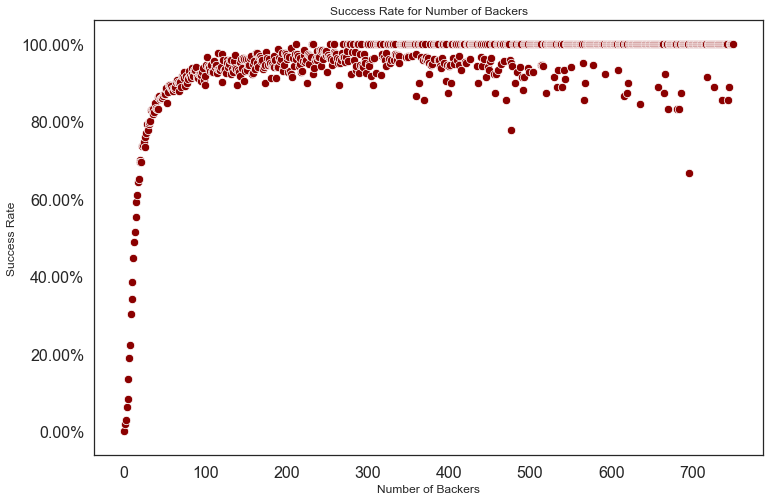

In [46]:
# Creating a dataframe with index = number-of-backers and columss fail-count, success-count and success-rate
num_of_backers = df.groupby(['backers_count','success']).count()
num_of_backers = num_of_backers['usd_pledged'].unstack()
num_of_backers = num_of_backers.fillna(0)
num_of_backers['success_rate'] = num_of_backers[1] / (num_of_backers[0] + num_of_backers[1])
num_of_backers_plot = num_of_backers[0:751] # restricting to ffirst 750 entries of 3228
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data = num_of_backers_plot['success_rate'], color='darkred', s=70)
ax.set_title('Success Rate for Number of Backers')
ax.set_xlabel('Number of Backers')
ax.set_ylabel('Success Rate')
ax.tick_params(labelsize=16)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig('figures/success_rates_for_number_of_backers.png', transparent=True)
plt.show()

**Observation:** At more than 200 backers, the successrate is much higher then for < 200

## 6.6 Success based on Staff Pick

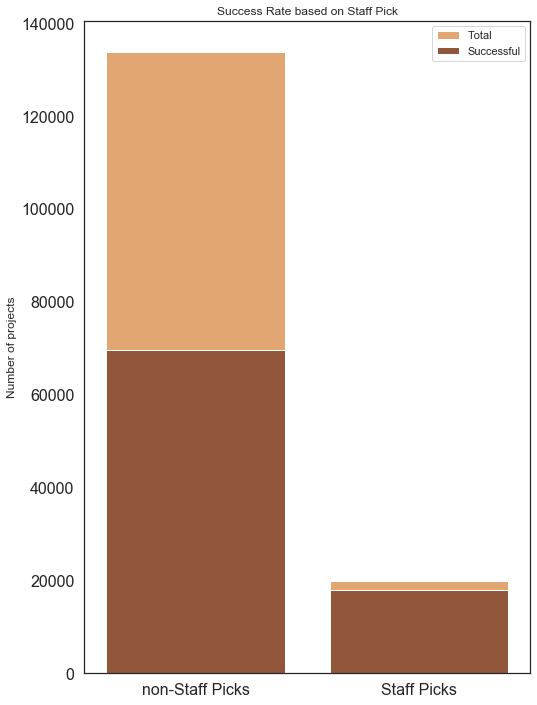

In [47]:
###### DATA SELECTION by defining a new table #######
success_staffpick = df.groupby(by=['staff_pick', 'success']).count()
success_staffpick = success_staffpick['usd_pledged'].unstack('success').fillna(0)
success_staffpick.columns = ['failed', 'successful']
success_staffpick['staff_pick'] = ['non-Staff Picks', 'Staff Picks']
success_staffpick['total'] = success_staffpick['successful'] + success_staffpick['failed'] 
#success_staffpick['success_rate'] = success_staffpick['successful'] / (success_staffpick['successful'] + success_staffpick['failed'])

###### PLOT SETTINGS #######
f, ax = plt.subplots(figsize=(8, 12))

sns.barplot(x='staff_pick', y='total', data=success_staffpick, label='Total', color="sandybrown")
sns.barplot(x='staff_pick', y='successful', data=success_staffpick, label='Successful', color='sienna')

plt.tick_params(labelsize=16)
plt.title("Success Rate based on Staff Pick")
plt.xlabel("")
plt.ylabel("Number of projects")
plt.legend()

### CLEANING WORKSPACE ###
del success_staffpick

###### OUTPUT #######
plt.savefig('figures/success_per_staffpick.png', bbox_inches='tight', transparent=True)
plt.show()

**Observation:** about 2200 projects are "Staff Pick", of which only about 200 are non-successful. For non-staff picks, the successrate is about 50%. Staff pick hence has a great influence on the successrate. 

## 6.7 Correlation Matrix

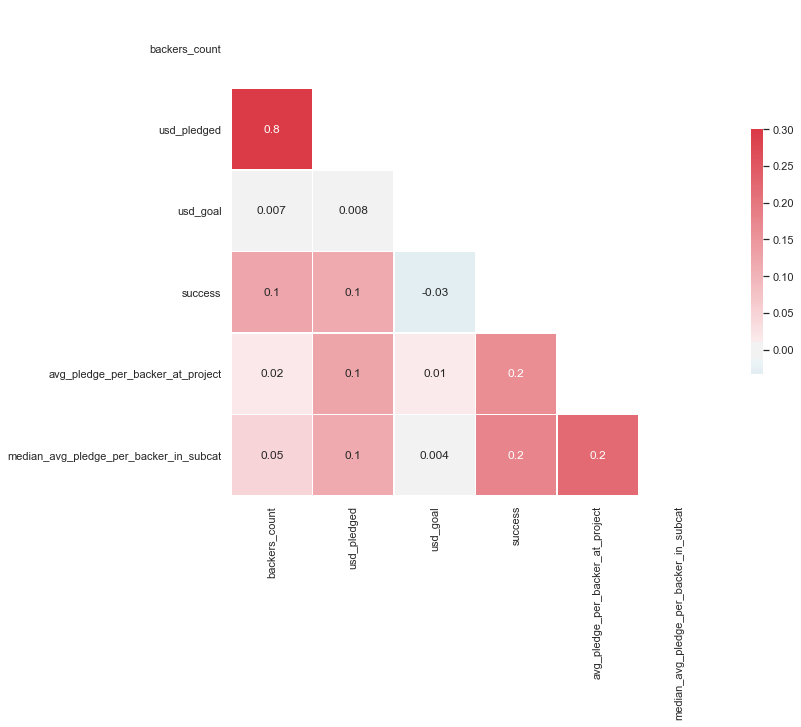

In [48]:
# Plot correlation heatmap for remaining continuous variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_clean.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");

**Observation:** No clear correlation is observable. Greatest correlation to Success can be found in the median avg pledge in the subcategory. Note that usd_pledeged and avg_pledge_per_backer_at_project are to be droped as they give away data not known before the start of the campaign. 

## 6.8 Remaining Columns

In [49]:
print('REMAINING COLMS: ')
print(df.columns)

REMAINING COLMS: 
Index(['backers_count', 'country', 'currency', 'staff_pick', 'usd_pledged',
       'usd_goal', 'success', 'total_category', 'duration_days', 'launch_hour',
       'launch_day', 'launch_month', 'launch_year', 'deadline_hour',
       'deadline_day', 'deadline_month', 'deadline_year',
       'avg_pledge_per_backer_at_project',
       'median_avg_pledge_per_backer_in_subcat'],
      dtype='object')


# 7. Feature Engineering

Annotation: Our addintinal features are:
- 'total_category' created in 5.8
- 'avg_pledge_per_backer_at_project' created in 5.11
- 'median_avg_pledge_per_backer_in_subcat' created in 6.4

# 8. Predictive Modeling (Preparations) 
Train machine learning models (supervised learning), evaluate their performance and use them to make predictions

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153845 entries, 0 to 186498
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   backers_count                           153845 non-null  int64   
 1   country                                 153845 non-null  category
 2   currency                                153845 non-null  category
 3   staff_pick                              153845 non-null  category
 4   usd_pledged                             153845 non-null  float64 
 5   usd_goal                                153845 non-null  float64 
 6   success                                 153845 non-null  int64   
 7   total_category                          153845 non-null  object  
 8   duration_days                           153845 non-null  category
 9   launch_hour                             153845 non-null  category
 10  launch_day                      

## 8.1 Downsampling

An unequal distribution of successful and non-successful targets is observed. In the follwoing, downsampling is done to equal the distributions of the target feature.capitalize 

In [51]:
df_clean.shape

(153845, 19)

In [52]:
print(df_clean['success'].value_counts())
n_samples_minority = df_clean['success'].value_counts()[0]
print('n_samples_minority:', n_samples_minority)

1    87726
0    66119
Name: success, dtype: int64
n_samples_minority: 66119


In [53]:
# Separate majority and minority classes
df_clean_majority = df_clean[df_clean.success==1]
df_clean_minority = df_clean[df_clean.success==0]

# Downsample majority class
df_clean_majority_downsampled = resample(df_clean_majority, 
                                         replace=False,      # sample without replacement
                                         n_samples=n_samples_minority,    # to match minority class
                                         random_state=RSEED) # reproducible results

In [54]:
df_clean_majority['success'].value_counts()

1    87726
Name: success, dtype: int64

In [55]:
df_clean_majority_downsampled['success'].value_counts()

1    66119
Name: success, dtype: int64

In [56]:
# Combine minority class with downsampled majority class
df_model = pd.concat([df_clean_majority_downsampled, df_clean_minority])
 
# Display new class counts
df_model['success'].value_counts()

1    66119
0    66119
Name: success, dtype: int64

## 8.2 Deleting DataLeakage Candidates

In [57]:
df_model.shape

(132238, 19)

In [58]:
df_model.drop('backers_count', axis=1, inplace=True) #--> a) most likely not known by client and b) high risk of data leakage
df_model.drop('usd_pledged', axis=1, inplace=True) #--> high risk of data leakage since usd_pledget < usd_goal = failed 
df_model.drop('avg_pledge_per_backer_at_project', axis=1, inplace=True) # Data Leakage in avg_pledge_per_backer, logic: this value can not be known beforehand 
df_model.shape

(132238, 16)

## 8.3 Preperations and polishing of df_model

In [59]:
#turning timestamp-delta into int for `duration_days`
df_model['duration_days'] = df_model['duration_days'].dt.days

In [60]:
#total_cat: type = obj --> type = category 
df_model['total_category'] = df_model['total_category'].astype('category')

In [61]:
#transforming ints that are classified as category to ints 
lst = ['staff_pick', 'duration_days', 'launch_hour', 'launch_year', 'deadline_hour', 'deadline_year']
for feature in lst: 
    df_model[feature] = df_model[feature].astype('int')

In [62]:
df_model.head().T

,137407,110127,75542,90415,48562
country,US,CA,FR,US,US
currency,USD,CAD,EUR,USD,USD
staff_pick,0,0,0,0,0
usd_goal,30000,4373.09,2178.67,20000,6000
success,1,1,1,1,1
total_category,Fashion//Apparel,Film & Video//Documentary,Crafts//Crafts,Publishing//Periodicals,Games//Video Games
duration_days,44,55,30,30,29
launch_hour,14,15,16,18,1
launch_day,Tuesday,Tuesday,Tuesday,Wednesday,Tuesday
launch_month,February,December,May,March,February


## 8.4 Saving downsampled 'df_model' to Pickle

In [63]:
savepath = 'df_model.pkl'
df_model.to_pickle(savepath)